In [133]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [167]:
from dropout_defense import Dropout_defense
import utils
import matplotlib.pyplot as plt
import numpy as np
import torch

In [204]:
t = Dropout_defense(dataset='mnist')


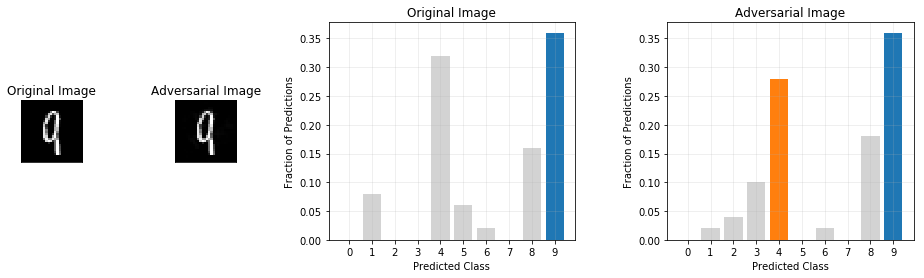

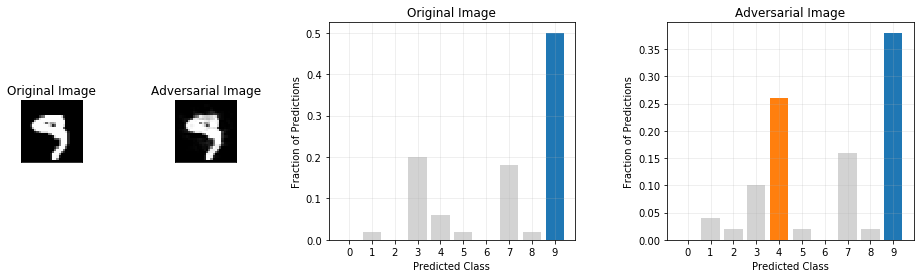

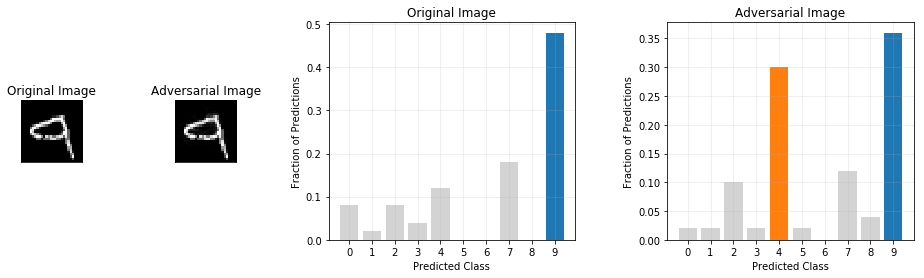

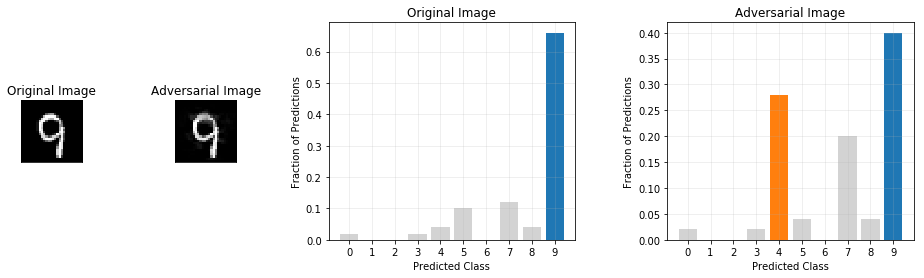

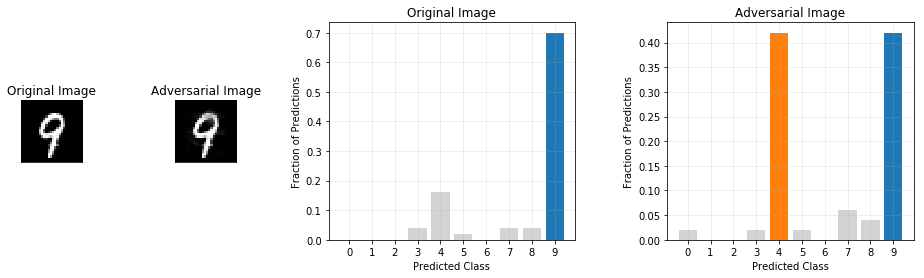

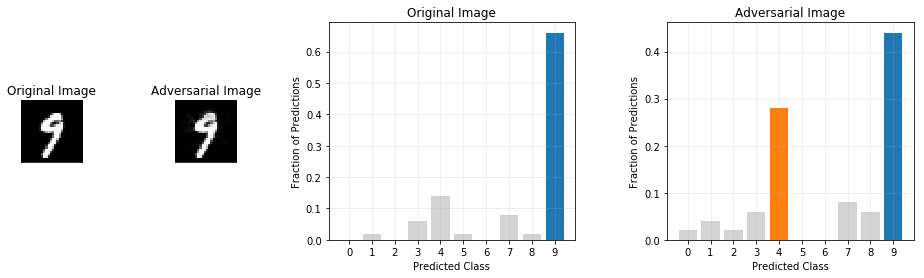

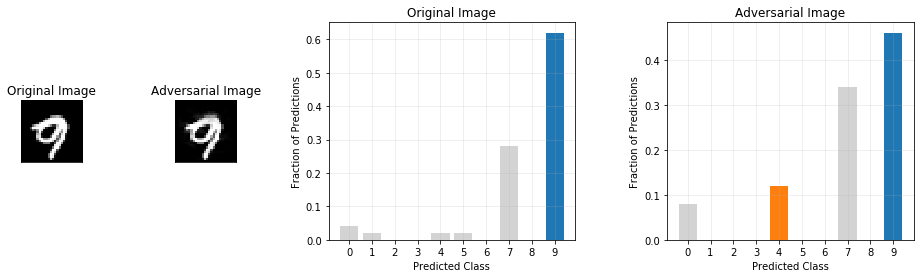

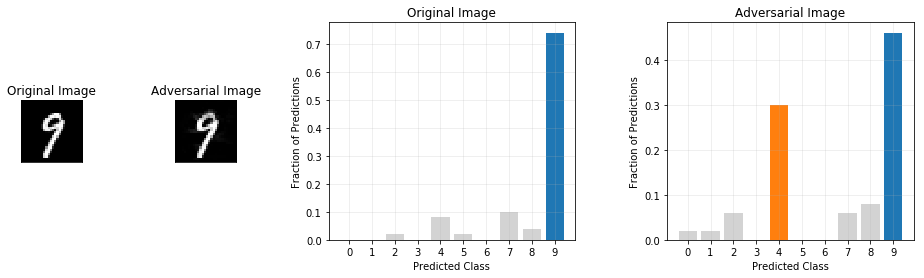

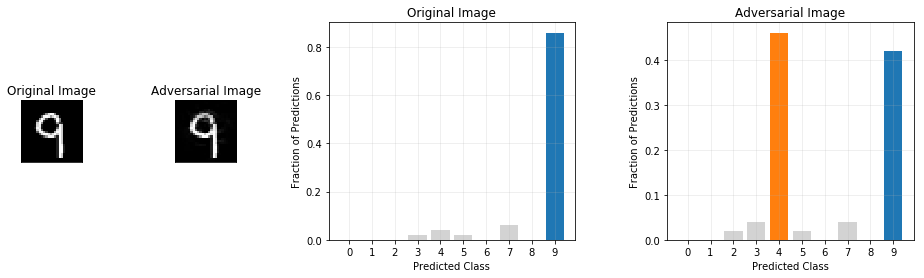

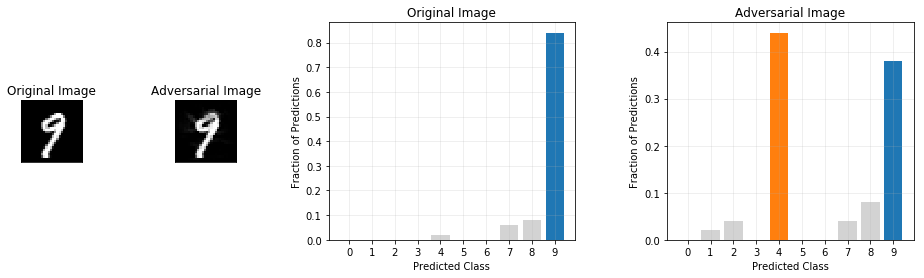

In [208]:
t.visualize(dropout_prob=0.5,
            original_label=9,
            target_label=4,
            ensemble_size=50,
            num_to_plot=10)


In [65]:
print(t.dataset)
print(t.file_name)


cifar
cifar_eps_5e-3


In [156]:
data = utils.get_adv_data('cifar_eps_5e-3', 
                           original_label=2, 
                           target_label=4, 
                           batch_size=1)

my_model = utils.trained_model('cifar', 0.1)

In [157]:
s = iter(data).next()
original, pert, adv, orig_label, target_label = s # unpack

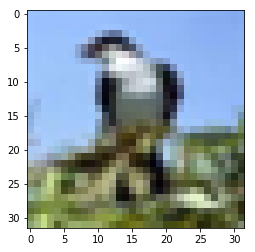

In [158]:
plt.imshow(original.squeeze(0).numpy().transpose(1,2,0))
plt.show()


In [165]:
# Original image ensemble predictions
orig_stacked = adv.clone().repeat(100,1,1,1)
my_model.train()
out = torch.argmax(my_model(orig_stacked),dim=1)
out

tensor([ 2,  2,  4,  7,  4,  2,  2,  7,  9,  7,  2,  2,  4,  4,
         7,  4,  2,  2,  7,  4,  2,  2,  7,  4,  0,  5,  4,  4,
         5,  2,  7,  4,  2,  2,  7,  2,  4,  4,  4,  2,  2,  2,
         4,  9,  2,  2,  7,  2,  2,  7,  2,  2,  9,  2,  4,  4,
         2,  4,  9,  7,  4,  4,  7,  2,  4,  2,  4,  2,  4,  2,
         5,  2,  4,  2,  7,  4,  2,  4,  2,  4,  7,  4,  4,  2,
         4,  2,  4,  4,  5,  2,  4,  2,  4,  2,  2,  2,  4,  0,
         2,  4])

# =====================================

In [52]:
t = utils.get_adv_data('cifar_eps_5e-3.npz', original_label=1, target_label=9, batch_size=10)


In [53]:
s = iter(t).next()

In [54]:
s[0].size()


torch.Size([10, 3, 32, 32])

In [43]:
s = s.repeat(5,1,1,1)

In [46]:

for i in range(10):
    if i == 7:
        continue
    print(i)
    

0
1
2
3
4
5
6
8
9


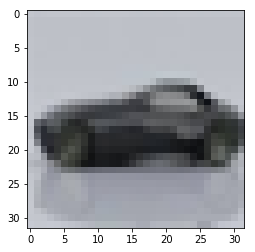

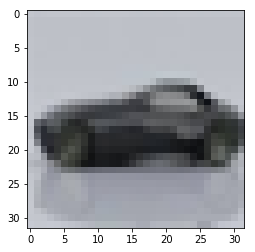

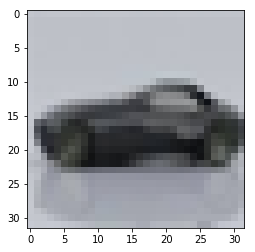

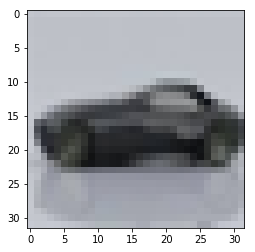

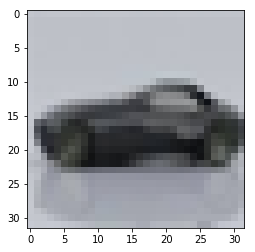

In [44]:
for i in range(5):
    plt.imshow(s[i].numpy().transpose(1,2,0))
    plt.show()

In [28]:
a = torch.rand(1,3,2,2)
a

tensor([[[[ 0.4315,  0.5181],
          [ 0.9661,  0.5664]],

         [[ 0.1513,  0.5040],
          [ 0.9780,  0.2350]],

         [[ 0.2518,  0.2895],
          [ 0.7337,  0.0584]]]])

In [31]:
a.size()

torch.Size([1, 3, 2, 2])

In [32]:
a.repeat(3,1,1,1).size()

torch.Size([3, 3, 2, 2])

In [4]:
my_model = utils.trained_model('cifar')


In [8]:
sample_batch = iter(t).next()
preds = my_model(sample_batch[2])
torch.argmax(preds,1)


tensor([ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
         9,  9,  9,  9,  9,  9,  9,  9])

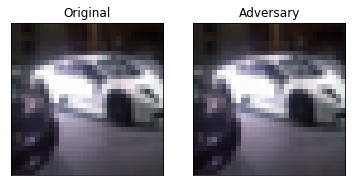

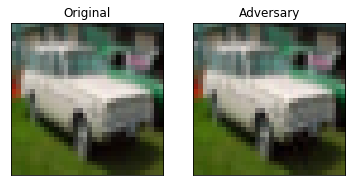

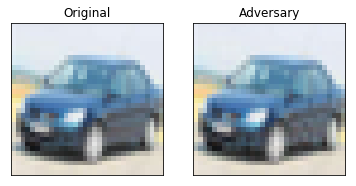

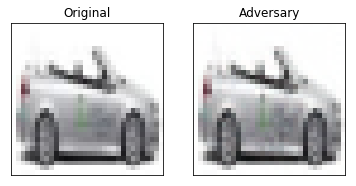

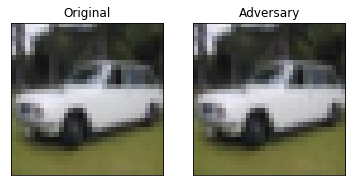

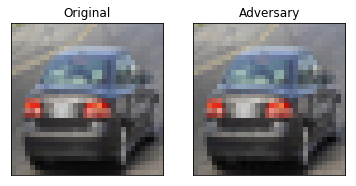

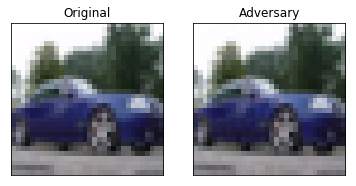

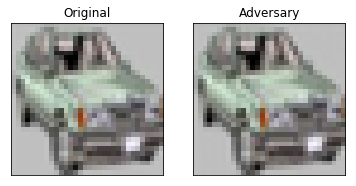

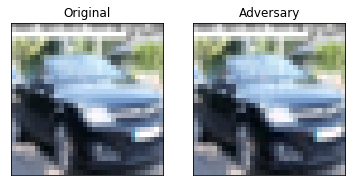

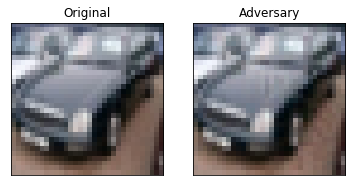

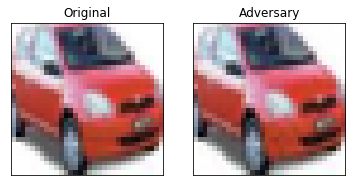

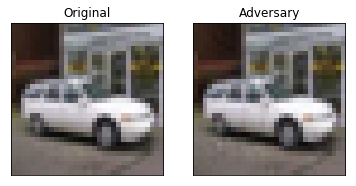

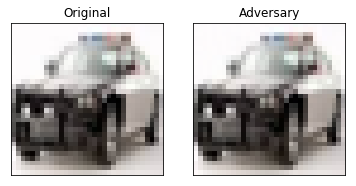

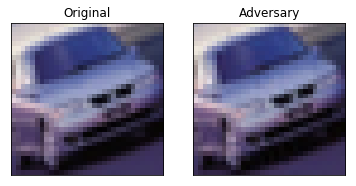

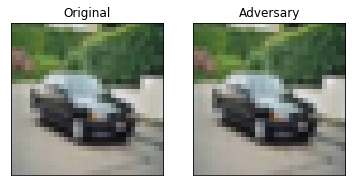

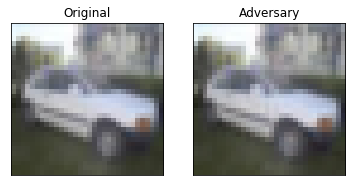

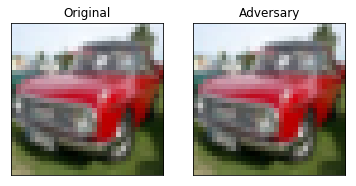

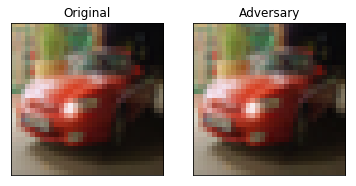

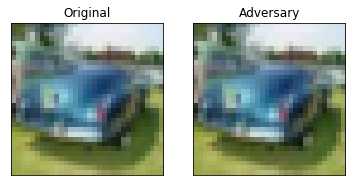

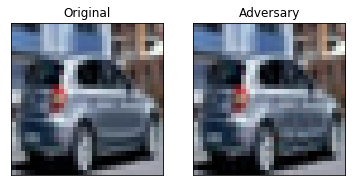

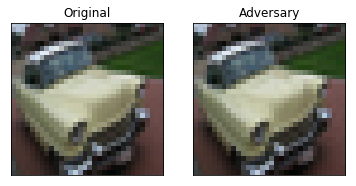

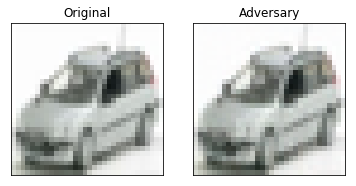

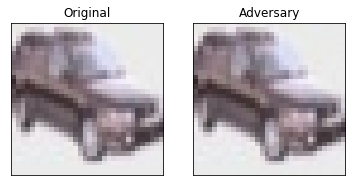

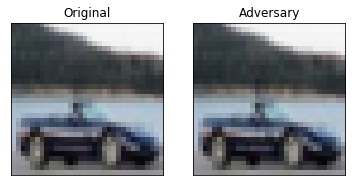

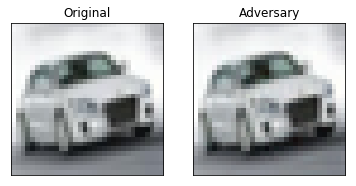

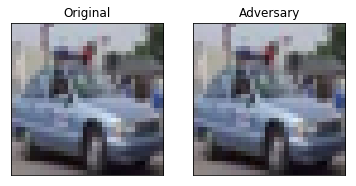

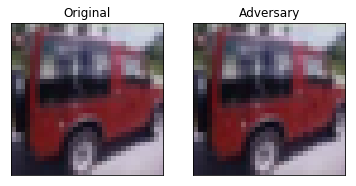

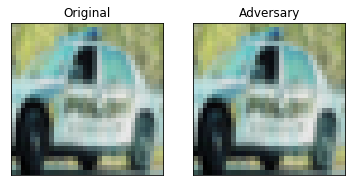

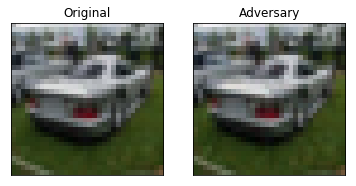

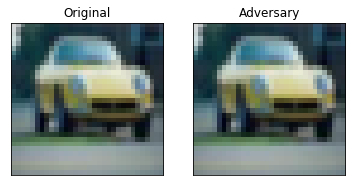

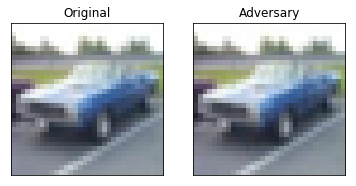

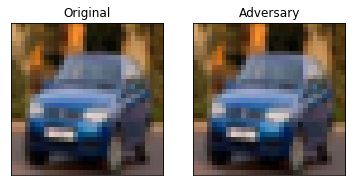

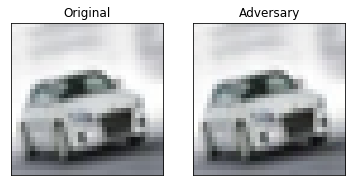

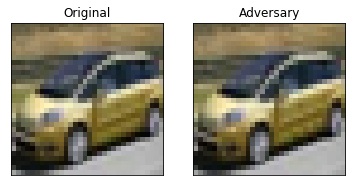

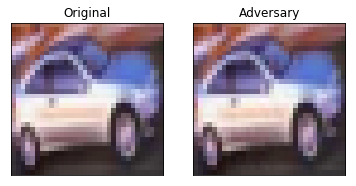

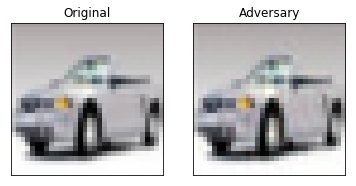

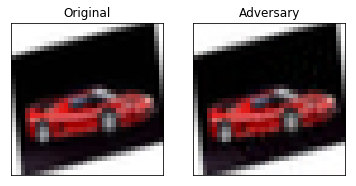

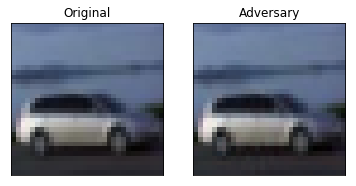

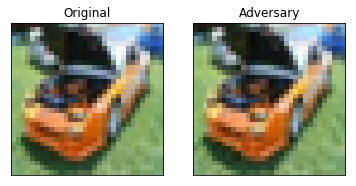

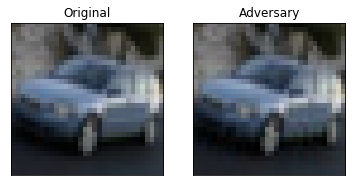

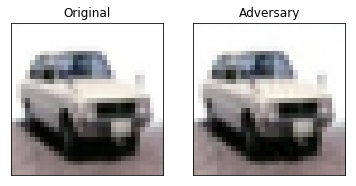

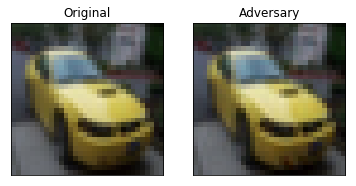

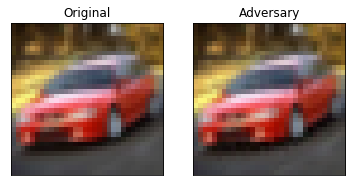

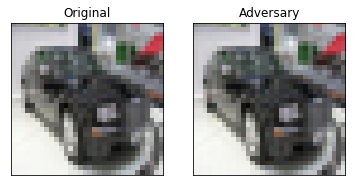

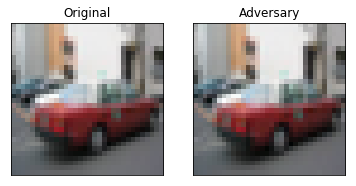

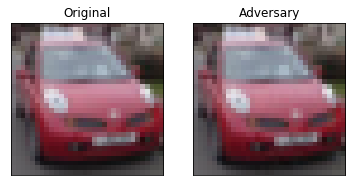

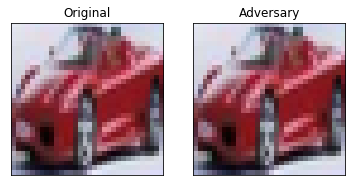

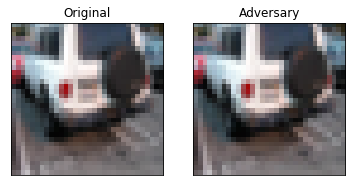

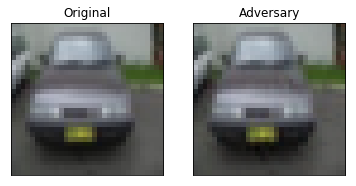

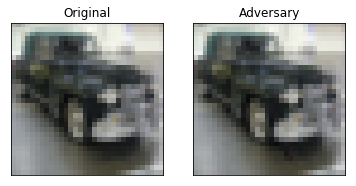

In [9]:
sample_batch = iter(t).next()

originals = sample_batch[0]
adversaries = sample_batch[2]

for i in range(len(originals)):
    plt.subplot(1,2,1)
    plt.imshow(originals[i].numpy().transpose((1,2,0)))
    plt.title('Original')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(1,2,2)
    plt.imshow(adversaries[i].numpy().transpose((1,2,0)))
    plt.title('Adversary')
    plt.xticks([])
    plt.yticks([])
    plt.show()